In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
# os.chdir(r"D:\Git_repos\OpenCV_tutorial\My_assignments\Exc_15")

img_original_1 = cv2.imread('1_bill.jpg') #query
img_original_10 = cv2.imread('10_bill.jpg') #query
img_original_20 = cv2.imread('20_bill.jpg') #query
img_original_100 = cv2.imread('100_bill.jpg') #query

base_img = cv2.imread('dollars.png') #train

In [7]:
def sift_object_matcher(object_image, base_image):
    if type(object_image) == str:
        object_image = cv2.imread(object_image) #query

    if type(base_image) == str:
        base_image = cv2.imread(base_image) #query
    result = base_image.copy()

    img1 = cv2.cvtColor(object_image, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)

    # Initiate SIFT detector
    sift = cv2.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
            
    MIN_MATCH_COUNT = 10


    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        result = cv2.polylines(result,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None
        

    plt.figure(figsize=[15,4])
    plt.subplot(131),plt.imshow(object_image[...,::-1]),plt.title('Object');
    plt.subplot(132),plt.imshow(base_image[...,::-1]),plt.title('Base image');
    plt.subplot(133),plt.imshow(result[...,::-1]),plt.title('result');

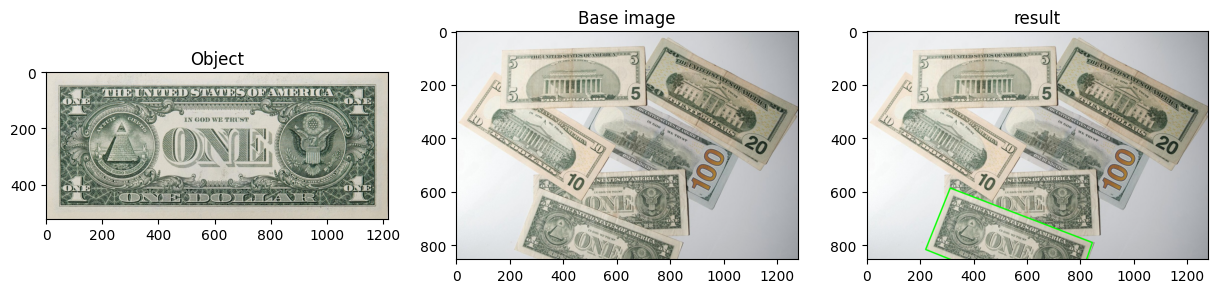

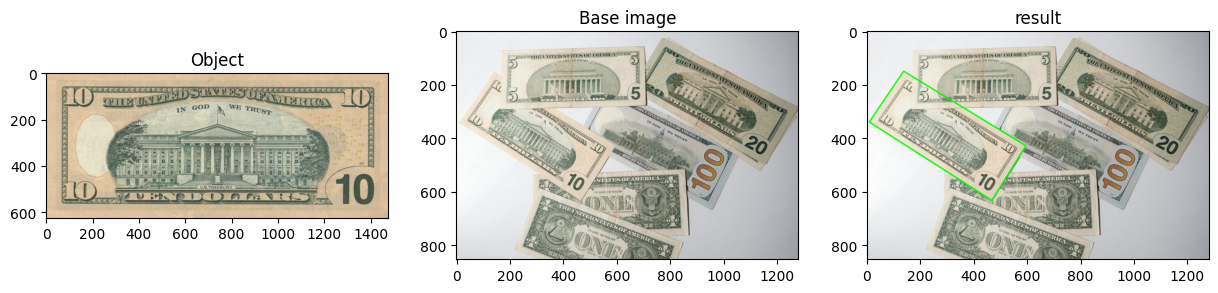

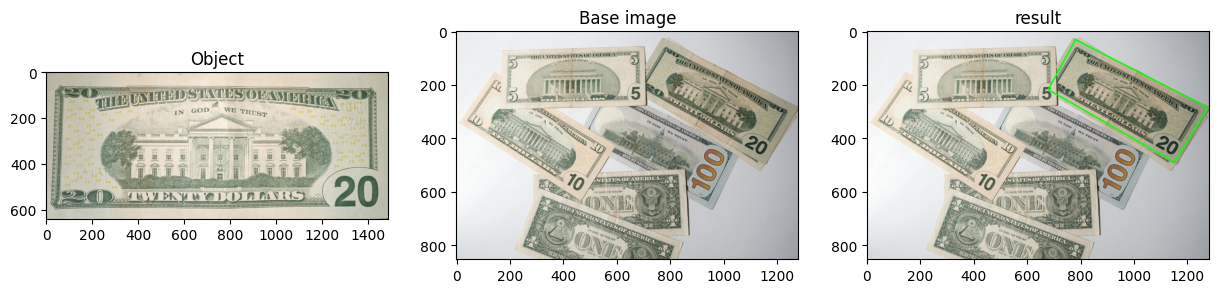

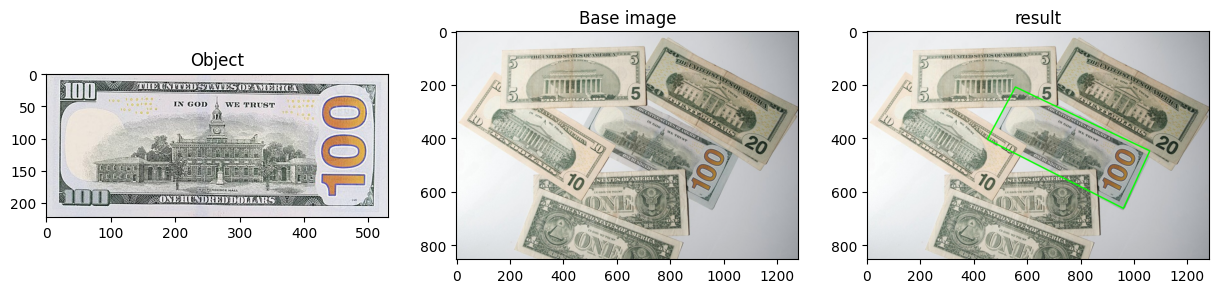

In [8]:
sift_object_matcher(img_original_1, base_img)
sift_object_matcher(img_original_10, base_img)
sift_object_matcher(img_original_20, base_img)
sift_object_matcher(img_original_100, base_img)